<a href="https://colab.research.google.com/github/KUZMA-HDT/LAB/blob/master/%D0%96%D1%83%D1%80%D0%BD%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D0%B2%D0%BE%D1%80%D0%BE%D0%BD%D0%BE%D0%BC%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Итак, нужен инструмент для анализа упаковок.
Один из них-диаграмма вороного и триангуляция делонэ.
Заручимся поддержкой ИИ и начнём со случайной генерации точек и созданию оных диаграмм на основании этих точек.


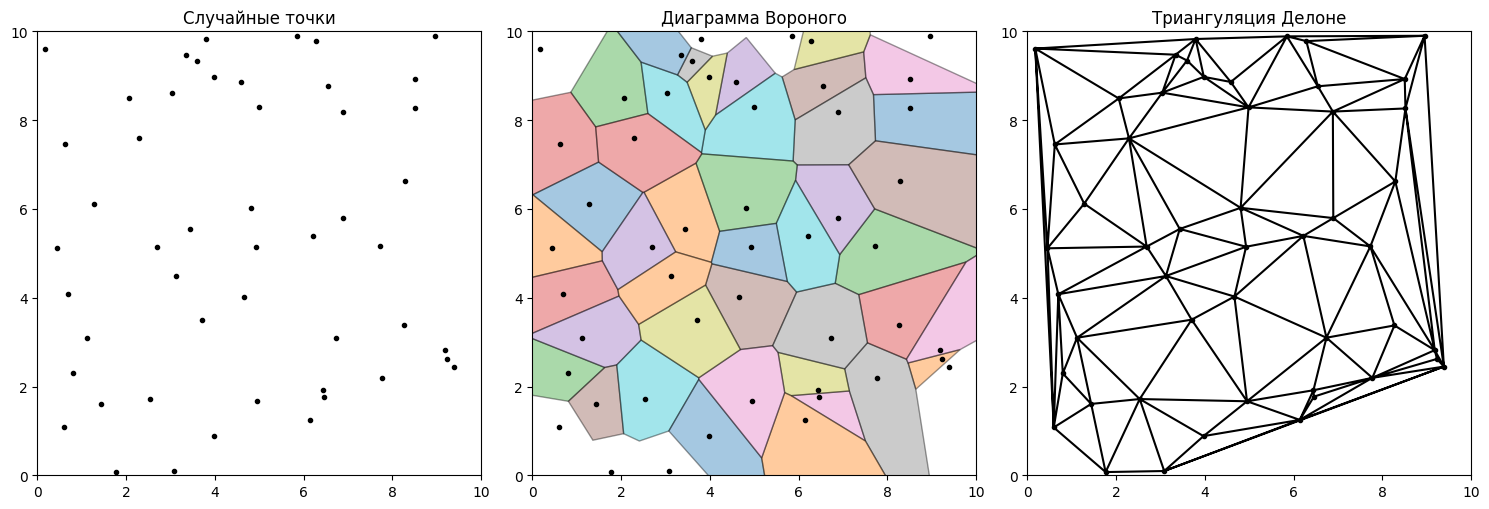

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, Delaunay

def generate_random_points(num_points, x_range, y_range):
    """Генерирует случайные точки в заданном диапазоне."""
    x = np.random.uniform(x_range[0], x_range[1], num_points)
    y = np.random.uniform(y_range[0], y_range[1], num_points)
    return np.column_stack((x, y))

def plot_points(points, ax):
    """Отображает точки на заданном axes."""
    ax.plot(points[:, 0], points[:, 1], 'ko', markersize=3)

def plot_voronoi(points, ax):
  """Строит диаграмму Вороного."""
  vor = Voronoi(points)
  for region in vor.regions:
    if not region or -1 in region:
      continue
    polygon = [vor.vertices[i] for i in region]
    ax.fill(*zip(*polygon), alpha=0.4, edgecolor = 'k')

def plot_delaunay(points, ax):
    """Строит триангуляцию Делоне."""
    tri = Delaunay(points)
    ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='black')

if __name__ == "__main__":
    num_points = 50  # Количество точек
    x_range = [0, 10]  # Диапазон x
    y_range = [0, 10]  # Диапазон y

    points = generate_random_points(num_points, x_range, y_range)

    # Настройка subplot'ов
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # 1. Исходные точки
    axs[0].set_title("Случайные точки")
    plot_points(points, axs[0])
    axs[0].set_xlim(x_range)
    axs[0].set_ylim(y_range)
    axs[0].set_aspect('equal', adjustable='box')

    # 2. Диаграмма Вороного
    axs[1].set_title("Диаграмма Вороного")
    plot_voronoi(points, axs[1])
    plot_points(points, axs[1])
    axs[1].set_xlim(x_range)
    axs[1].set_ylim(y_range)
    axs[1].set_aspect('equal', adjustable='box')


    # 3. Триангуляция Делоне
    axs[2].set_title("Триангуляция Делоне")
    plot_delaunay(points, axs[2])
    plot_points(points, axs[2])
    axs[2].set_xlim(x_range)
    axs[2].set_ylim(y_range)
    axs[2].set_aspect('equal', adjustable='box')


    plt.tight_layout()
    plt.show()


Ячейка     Площадь         Цвет (RGB)               
--------------------------------------------------
0          4.46            (85, 0, 170)
2          3.43            (64, 0, 191)
3          1.66            (26, 0, 229)
4          12.03           (246, 0, 8)
7          6.89            (137, 0, 118)
9          2.62            (46, 0, 209)
10         12.47           (255, 0, 0)
11         1.11            (14, 0, 241)
12         0.61            (4, 0, 251)
13         4.03            (76, 0, 179)
14         1.51            (23, 0, 232)
15         7.22            (144, 0, 111)
16         3.72            (70, 0, 185)
19         1.62            (25, 0, 230)
20         1.17            (16, 0, 239)
21         9.50            (192, 0, 63)
23         5.02            (97, 0, 158)
25         2.90            (52, 0, 203)
29         1.60            (25, 0, 230)
30         5.52            (108, 0, 147)
31         0.57            (3, 0, 252)
32         1.16            (15, 0, 240)
33         1.27  

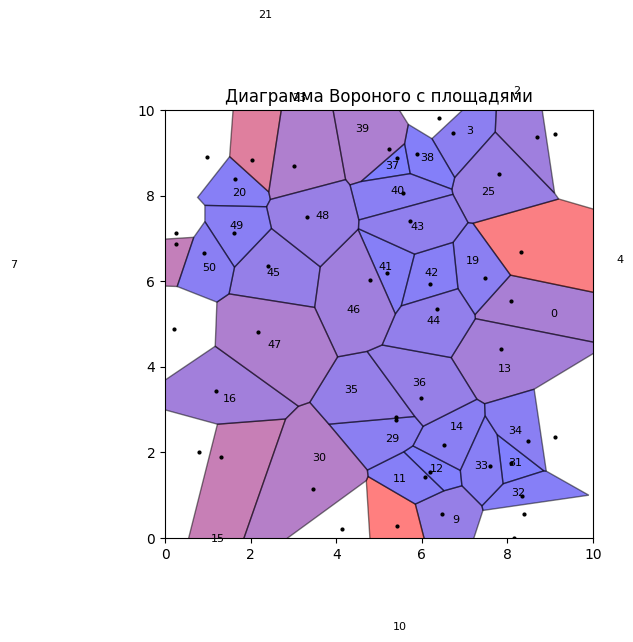

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon

def generate_random_points(num_points, x_range, y_range):
    """Генерирует случайные точки в заданном диапазоне."""
    x = np.random.uniform(x_range[0], x_range[1], num_points)
    y = np.random.uniform(y_range[0], y_range[1], num_points)
    return np.column_stack((x, y))

def calculate_polygon_area(vertices):
    """Вычисляет площадь многоугольника."""
    n = len(vertices)
    area = 0.0
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        area += (x1 * y2 - x2 * y1)
    return abs(area) / 2.0

def plot_voronoi_with_area(points, ax):
    """Строит диаграмму Вороного и раскрашивает ячейки в зависимости от площади."""
    vor = Voronoi(points)
    areas = []

    for i, region_index in enumerate(vor.regions):
      if not region_index or -1 in region_index:
            continue
      region_vertices = [vor.vertices[vertex_index] for vertex_index in region_index]
      area = calculate_polygon_area(region_vertices)
      areas.append((i, area, region_vertices))

    # Normalize areas to a 0-1 range
    min_area = min(area for _, area, _ in areas)
    max_area = max(area for _, area, _ in areas)
    if max_area == min_area:
       normalized_areas = [0.5 for _, _, _ in areas] # Assign middle color if all areas are the same
    else:
        normalized_areas = [(area - min_area) / (max_area - min_area) for _, area, _ in areas]

    # Define a colormap from blue to red
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'red'])

    # Plot voronoi cells and their numbers
    for (i, _, vertices), area, normalized_area in zip(areas, areas, normalized_areas):
      polygon = Polygon(vertices, closed=True, facecolor=cmap(normalized_area), edgecolor='k', alpha=0.5)
      ax.add_patch(polygon)

      # Calculate the center of polygon for text placement
      centroid_x = np.mean([v[0] for v in vertices])
      centroid_y = np.mean([v[1] for v in vertices])
      ax.text(centroid_x, centroid_y, str(i), ha='center', va='center', fontsize=8)

    # Print header for table
    print(f"{'Ячейка':<10} {'Площадь':<15} {'Цвет (RGB)':<25}")
    print("-" * 50)
    # Output area table with color representation
    for (i, area, _), normalized_area in zip(areas, normalized_areas):
         rgb_color = tuple(int(255 * x) for x in cmap(normalized_area)[:3])
         print(f"{i:<10} {area:<15.2f} {rgb_color}")

def plot_points(points, ax):
    """Отображает точки на заданном axes."""
    ax.plot(points[:, 0], points[:, 1], 'ko', markersize=2)

if __name__ == "__main__":
    num_points = 50
    x_range = [0, 10]
    y_range = [0, 10]

    points = generate_random_points(num_points, x_range, y_range)

    # Setup the plot
    fig, ax = plt.subplots(1, 1, figsize=(7, 7))
    ax.set_title("Диаграмма Вороного с площадями")

    plot_voronoi_with_area(points, ax)
    plot_points(points, ax) # Поместить точки поверх ячеек
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.show()


Ячейка     Площадь         Цвет (RGB)               
--------------------------------------------------
2          6.51            (43, 0, 211)
3          3.57            (22, 0, 233)
4          2.30            (14, 0, 241)
6          4.40            (28, 0, 227)
7          6.16            (40, 0, 214)
8          36.79           (255, 0, 0)
9          2.06            (12, 0, 243)
10         2.16            (13, 0, 242)
12         1.91            (11, 0, 244)
13         0.84            (3, 0, 252)
14         0.71            (2, 0, 253)
17         4.97            (32, 0, 223)
18         4.82            (31, 0, 224)
19         1.62            (9, 0, 246)
20         0.80            (3, 0, 252)
21         1.52            (8, 0, 247)
22         0.30            (0, 0, 255)
23         2.21            (13, 0, 242)
24         2.49            (15, 0, 240)
26         1.20            (6, 0, 249)
27         17.44           (120, 0, 135)
28         17.51           (120, 0, 135)
29         1.54       

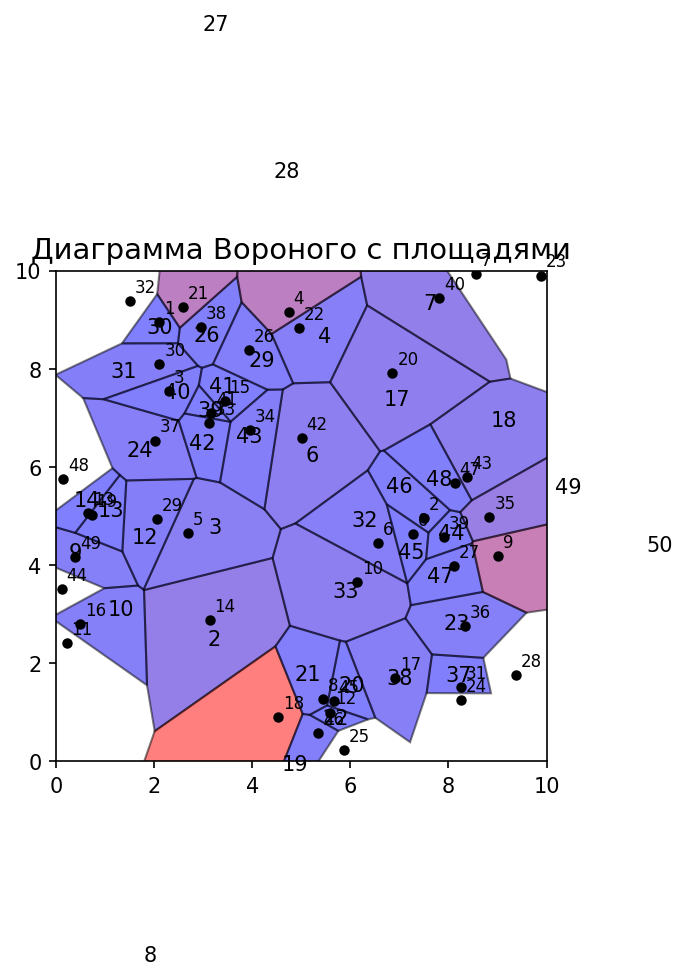

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon

def generate_random_points(num_points, x_range, y_range):
    """Генерирует случайные точки в заданном диапазоне."""
    x = np.random.uniform(x_range[0], x_range[1], num_points)
    y = np.random.uniform(y_range[0], y_range[1], num_points)
    return np.column_stack((x, y))

def calculate_polygon_area(vertices):
    """Вычисляет площадь многоугольника."""
    n = len(vertices)
    area = 0.0
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        area += (x1 * y2 - x2 * y1)
    return abs(area) / 2.0

def plot_voronoi_with_area(points, ax):
    """Строит диаграмму Вороного и раскрашивает ячейки в зависимости от площади."""
    vor = Voronoi(points)
    areas = []

    for i, region_index in enumerate(vor.regions):
      if not region_index or -1 in region_index:
            continue
      region_vertices = [vor.vertices[vertex_index] for vertex_index in region_index]
      area = calculate_polygon_area(region_vertices)
      areas.append((i, area, region_vertices))

    # Normalize areas to a 0-1 range
    min_area = min(area for _, area, _ in areas)
    max_area = max(area for _, area, _ in areas)
    if max_area == min_area:
       normalized_areas = [0.5 for _, _, _ in areas] # Assign middle color if all areas are the same
    else:
        normalized_areas = [(area - min_area) / (max_area - min_area) for _, area, _ in areas]

    # Define a colormap from blue to red
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'red'])

    # Plot voronoi cells and their numbers
    for (i, _, vertices), area, normalized_area in zip(areas, areas, normalized_areas):
      polygon = Polygon(vertices, closed=True, facecolor=cmap(normalized_area), edgecolor='k', alpha=0.5)
      ax.add_patch(polygon)

      # Calculate the center of polygon for text placement
      centroid_x = np.mean([v[0] for v in vertices])
      centroid_y = np.mean([v[1] for v in vertices])
      ax.text(centroid_x, centroid_y, str(i), ha='center', va='center', fontsize=10)

    # Print header for table
    print(f"{'Ячейка':<10} {'Площадь':<15} {'Цвет (RGB)':<25}")
    print("-" * 50)
    # Output area table with color representation
    for (i, area, _), normalized_area in zip(areas, normalized_areas):
         rgb_color = tuple(int(255 * x) for x in cmap(normalized_area)[:3])
         print(f"{i:<10} {area:<15.2f} {rgb_color}")

def plot_points(points, ax):
    """Отображает точки на заданном axes."""
    for i, (x, y) in enumerate(points):
        ax.plot(x, y, 'ko', markersize=4)
        ax.text(x + 0.1, y + 0.1, str(i), fontsize=8, ha='left', va='bottom')

if __name__ == "__main__":
    num_points = 50
    x_range = [0, 10]
    y_range = [0, 10]

    points = generate_random_points(num_points, x_range, y_range)

    # Setup the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=150) # increased figure size and dpi
    ax.set_title("Диаграмма Вороного с площадями", fontsize=14) # added fontsize
    ax.tick_params(axis='both', labelsize=10) # Set tick label size

    plot_voronoi_with_area(points, ax)
    plot_points(points, ax) # Поместить точки поверх ячеек
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.set_aspect('equal', adjustable='box')

    plt.tight_layout()
    plt.show()


Теперь пытаемся поиграть с opencv


Ячейка     Площадь         Цвет (RGB)               
--------------------------------------------------
2          99206.58        (55, 0, 200)
3          89479.26        (48, 0, 206)
4          5914.47         (0, 0, 255)
6          6062.64         (0, 0, 255)
7          6049.76         (0, 0, 255)
8          147869.26       (83, 0, 172)
9          373644.82       (216, 0, 39)
13         6037.05         (0, 0, 255)
14         7152.53         (0, 0, 255)
15         31199.96        (14, 0, 241)
16         5991.13         (0, 0, 255)
17         13183.92        (4, 0, 251)
18         8194.25         (1, 0, 254)
19         16081.44        (6, 0, 249)
20         32040.14        (15, 0, 240)
22         5931.75         (0, 0, 255)
23         5968.32         (0, 0, 255)
24         5920.58         (0, 0, 255)
25         5980.41         (0, 0, 255)
26         5793.03         (0, 0, 255)
27         5891.50         (0, 0, 255)
28         5900.44         (0, 0, 255)
29         52190.21        (27, 

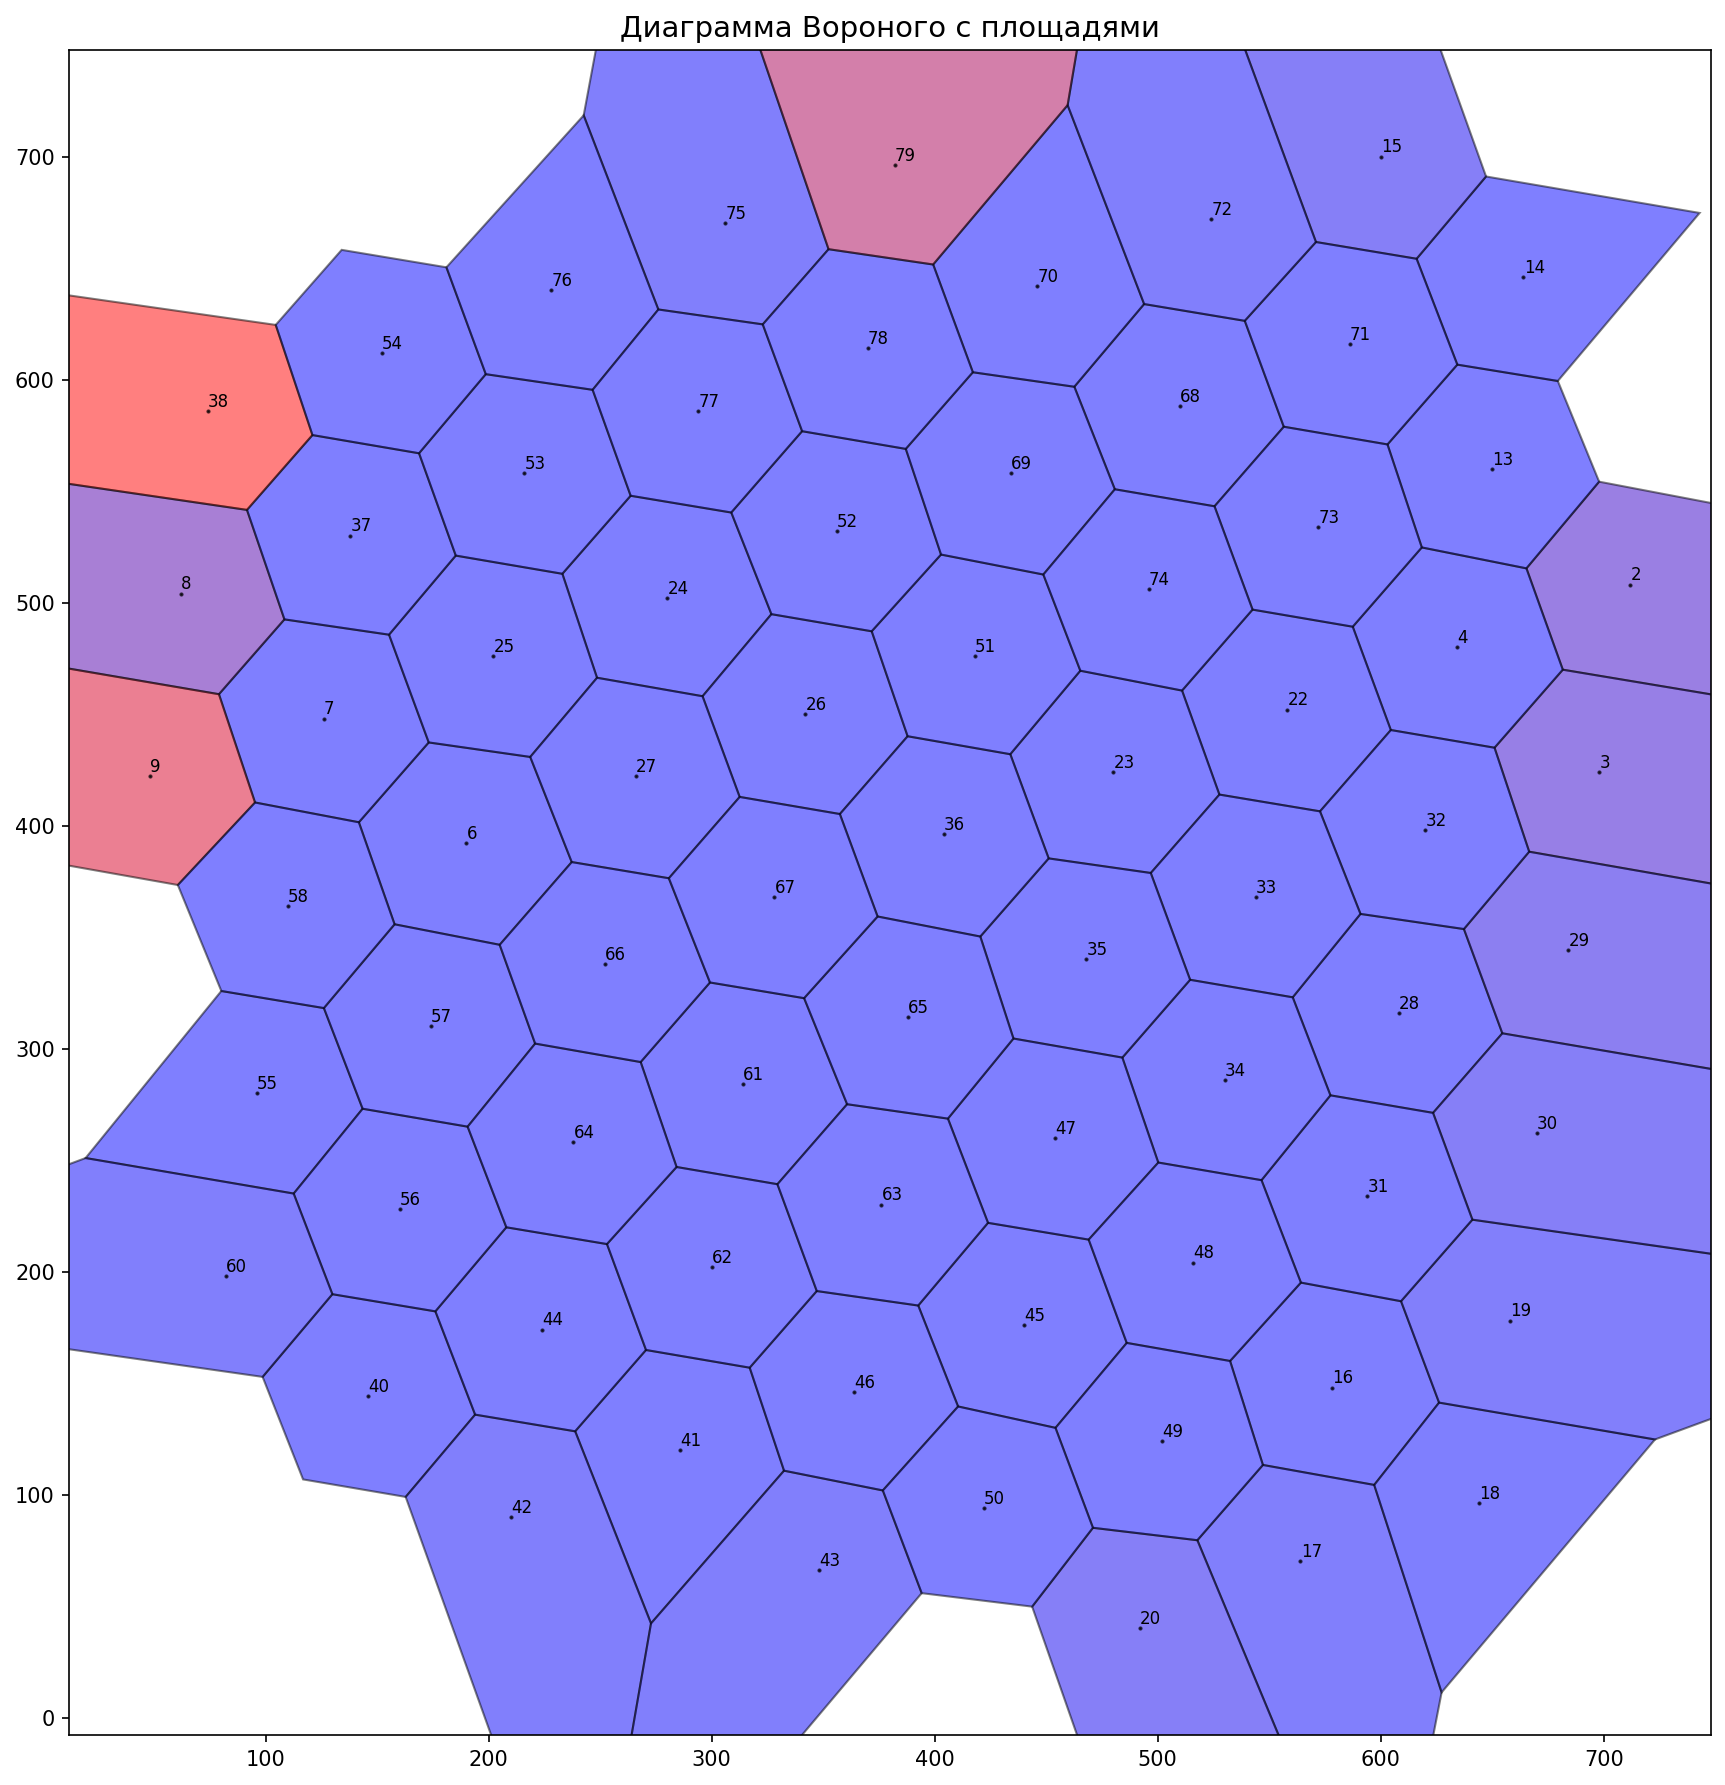

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
import cv2
import tkinter as tk
from tkinter import filedialog

def open_image_dialog():
    """Открывает диалоговое окно для выбора изображения."""
    root = tk.Tk()
    root.withdraw()  # Скрываем основное окно Tkinter
    file_path = filedialog.askopenfilename(title="Выберите изображение с кругами",
                                           filetypes=(("Image files", "*.png;*.jpg;*.jpeg"), ("All files", "*.*")))
    return file_path

def detect_circles_hough(image_path):
    """Обнаруживает круги на изображении с помощью преобразования Хафа."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
      print("Не удалось загрузить изображение.")
      return None

    # Размытие для уменьшения ложных срабатываний
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Преобразование Хафа
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=10, maxRadius=50)

    if circles is not None:
      circles = np.round(circles[0, :]).astype("int")
      return circles
    else:
      return None

def calculate_polygon_area(vertices):
    """Вычисляет площадь многоугольника."""
    n = len(vertices)
    area = 0.0
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        area += (x1 * y2 - x2 * y1)
    return abs(area) / 2.0

def plot_voronoi_with_area(points, ax, x_range, y_range, vor):
    """Строит диаграмму Вороного и раскрашивает ячейки в зависимости от площади."""
    areas = []

    for i, region_index in enumerate(vor.regions):
        if not region_index or -1 in region_index:
            continue
        region_vertices = [vor.vertices[vertex_index] for vertex_index in region_index]
        area = calculate_polygon_area(region_vertices)
        areas.append((i, area, region_vertices))

    # Normalize areas to a 0-1 range
    min_area = min(area for _, area, _ in areas)
    max_area = max(area for _, area, _ in areas)
    if max_area == min_area:
        normalized_areas = [0.5 for _, _, _ in areas]
    else:
        normalized_areas = [(area - min_area) / (max_area - min_area) for _, area, _ in areas]

    # Define a colormap from blue to red
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'red'])

    # Plot voronoi cells and their numbers
    for (i, _, vertices), area, normalized_area in zip(areas, areas, normalized_areas):
      polygon = Polygon(vertices, closed=True, facecolor=cmap(normalized_area), edgecolor='k', alpha=0.5)
      ax.add_patch(polygon)

    # Print header for table
    print(f"{'Ячейка':<10} {'Площадь':<15} {'Цвет (RGB)':<25}")
    print("-" * 50)
    # Output area table with color representation
    for (i, area, _), normalized_area in zip(areas, normalized_areas):
        rgb_color = tuple(int(255 * x) for x in cmap(normalized_area)[:3])
        print(f"{i:<10} {area:<15.2f} {rgb_color}")

    return areas

def plot_points(points, ax, voronoi_structure, voronoi_areas):
  """Отображает точки с подписями"""
  for i, (x, y) in enumerate(points):

      region_index = voronoi_structure.point_region[i]

      if region_index != -1: # Skip points that are not part of Voronoi region

        area_index = None
        for idx, area in enumerate(voronoi_areas):
            if area[0] == region_index:
              area_index = idx
              break

        if area_index is not None:
            ax.plot(x, y, 'ko', markersize=1, alpha=0.7) # Уменьшаем точки и делаем их полупрозрачными

            # Place the text close to the points
            ax.text(x + 0.1, y + 0.1, str(voronoi_areas[area_index][0]), fontsize=8, ha='left', va='bottom')


if __name__ == "__main__":
    image_path = "/content/circles01.jpg"

    if image_path:
        circles = detect_circles_hough(image_path)

        if circles is not None:
            points = np.array([(x, y) for x, y, _ in circles])

            if len(points) > 0:

                x_range = [np.min(points[:, 0]), np.max(points[:, 0])]
                y_range = [np.min(points[:, 1]), np.max(points[:, 1])]

                # Setup the plot
                fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=150)
                ax.set_title("Диаграмма Вороного с площадями", fontsize=14)
                ax.tick_params(axis='both', labelsize=10)

                vor = Voronoi(points)
                areas = plot_voronoi_with_area(points, ax, x_range, y_range, vor)
                plot_points(points, ax, vor, areas)

                ax.set_xlim(x_range[0]-20, x_range[1]+20)
                ax.set_ylim(y_range[0]-20, y_range[1]+20)
                ax.set_aspect('equal', adjustable='box')

                plt.tight_layout()
                plt.show()
            else:
              print('Не удалось определить точки из окружностей')
        else:
            print("Не удалось обнаружить круги на изображении.")
    else:
        print("Изображение не выбрано.")


Ячейка     Площадь         Цвет (RGB)               
--------------------------------------------------
2          99206.58        (55, 0, 200)
3          89479.26        (48, 0, 206)
4          5914.47         (0, 0, 255)
6          6062.64         (0, 0, 255)
7          6049.76         (0, 0, 255)
8          147869.26       (83, 0, 172)
9          373644.82       (216, 0, 39)
13         6037.05         (0, 0, 255)
14         7152.53         (0, 0, 255)
15         31199.96        (14, 0, 241)
16         5991.13         (0, 0, 255)
17         13183.92        (4, 0, 251)
18         8194.25         (1, 0, 254)
19         16081.44        (6, 0, 249)
20         32040.14        (15, 0, 240)
22         5931.75         (0, 0, 255)
23         5968.32         (0, 0, 255)
24         5920.58         (0, 0, 255)
25         5980.41         (0, 0, 255)
26         5793.03         (0, 0, 255)
27         5891.50         (0, 0, 255)
28         5900.44         (0, 0, 255)
29         52190.21        (27, 

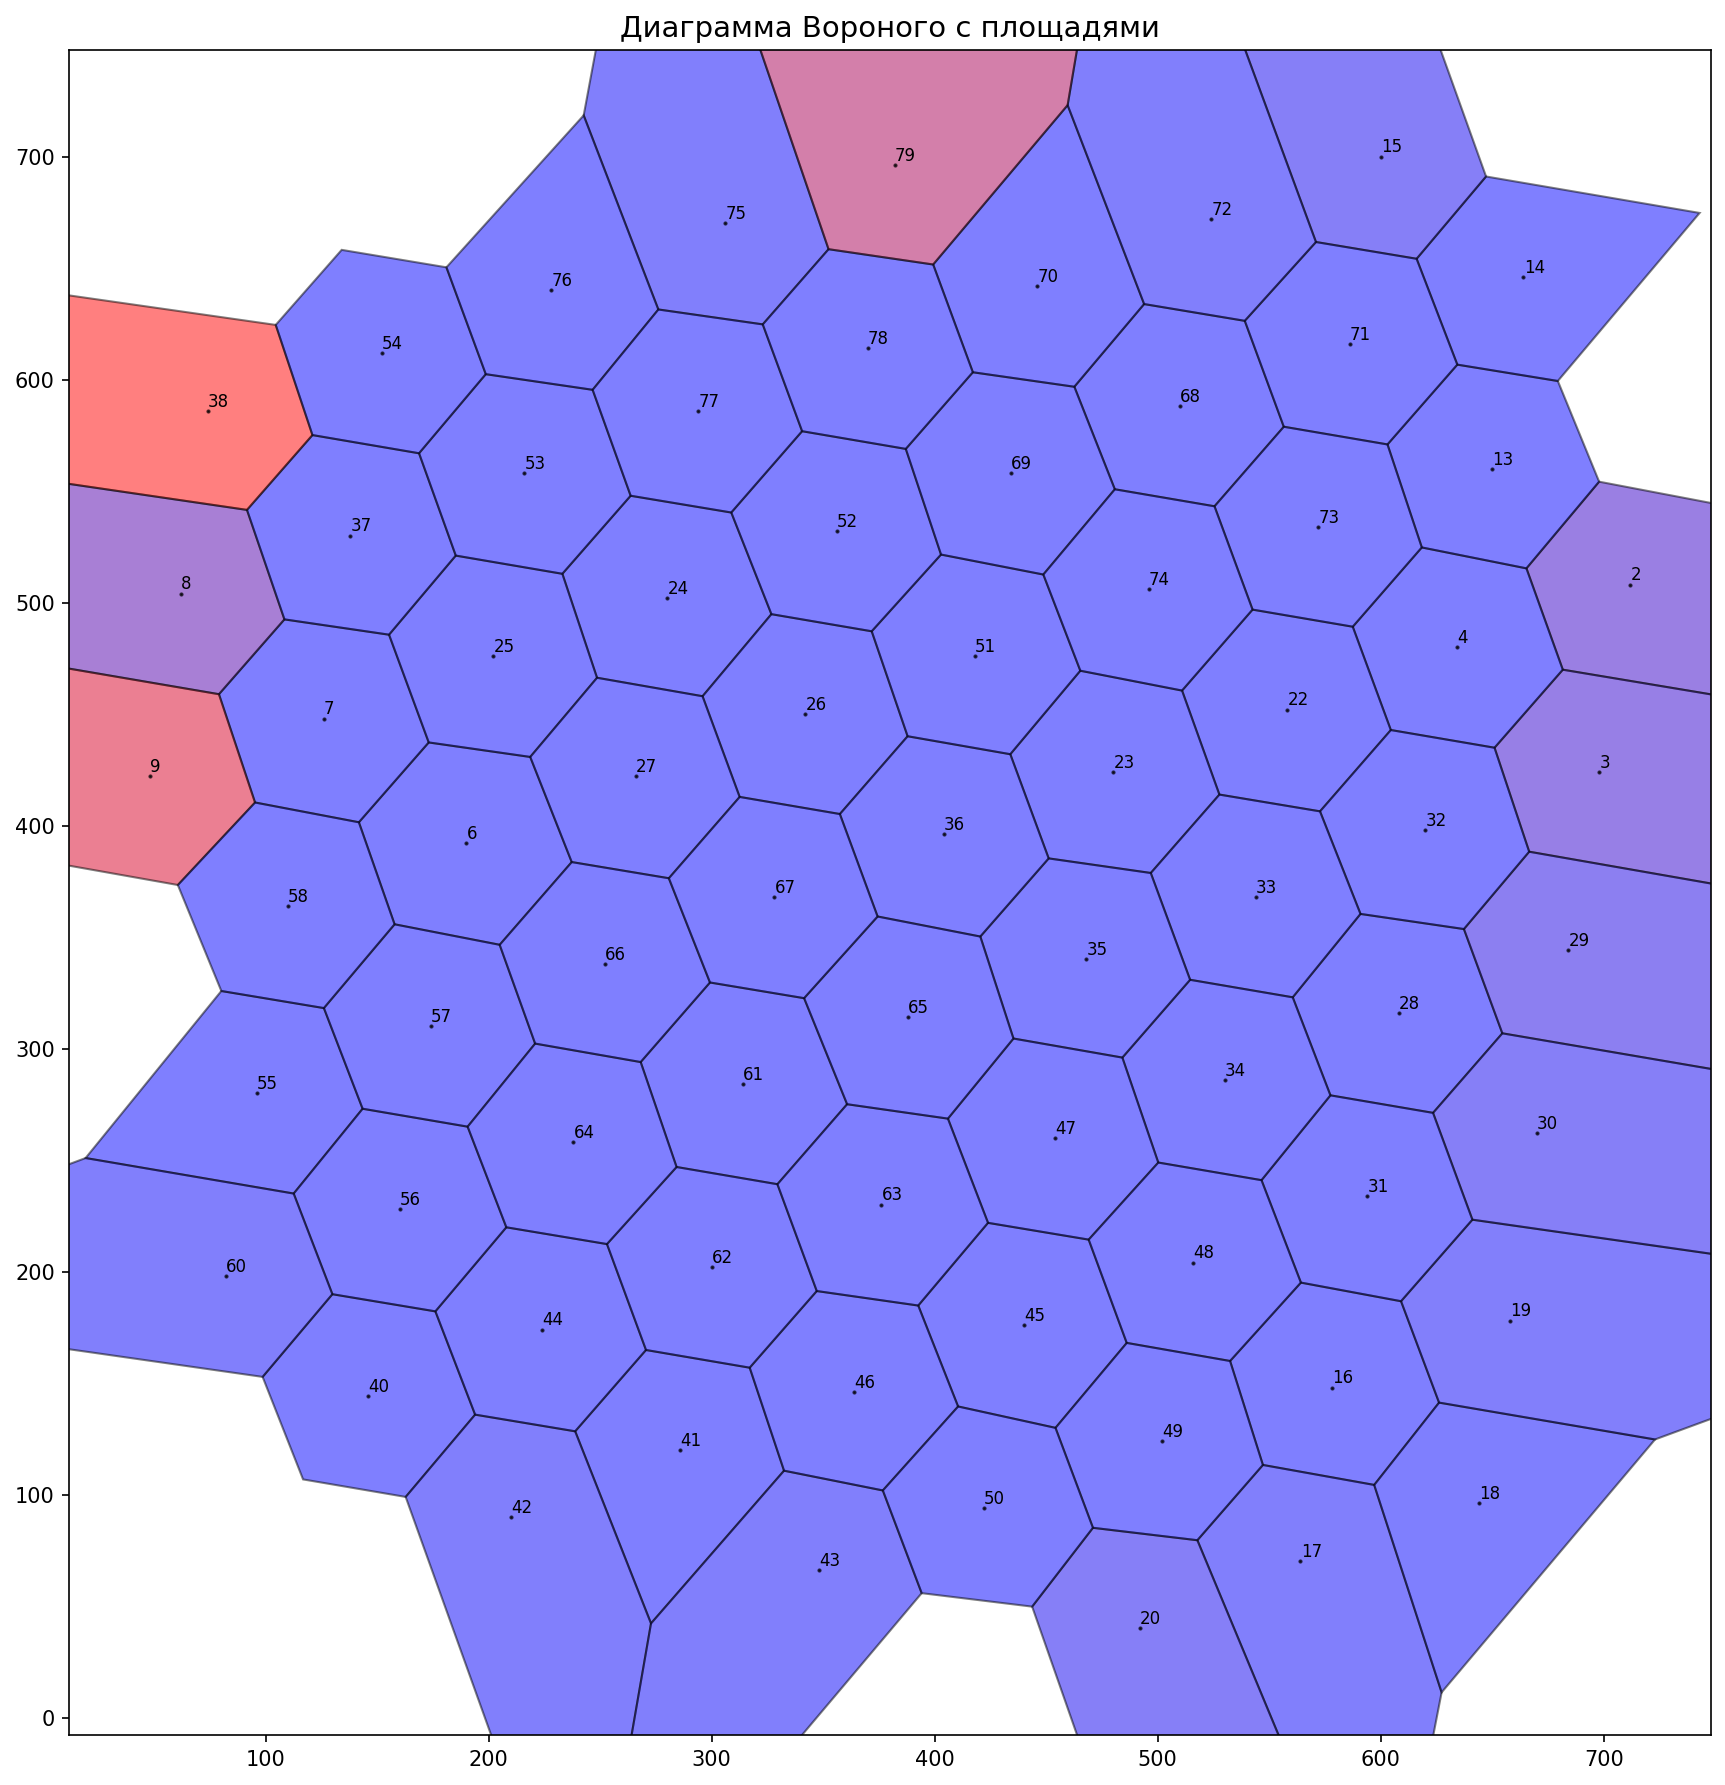

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
import cv2
import tkinter as tk
from tkinter import filedialog

def open_image_dialog():
    """Открывает диалоговое окно для выбора изображения."""
    root = tk.Tk()
    root.withdraw()  # Скрываем основное окно Tkinter
    file_path = filedialog.askopenfilename(title="Выберите изображение с кругами",
                                           filetypes=(("Image files", "*.png;*.jpg;*.jpeg"), ("All files", "*.*")))
    return file_path

def detect_circles_hough(image_path):
    """Обнаруживает круги на изображении с помощью преобразования Хафа."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
      print("Не удалось загрузить изображение.")
      return None

    # Размытие для уменьшения ложных срабатываний
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Преобразование Хафа
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=10, maxRadius=50)

    if circles is not None:
      circles = np.round(circles[0, :]).astype("int")
      return circles
    else:
      return None

def calculate_polygon_area(vertices):
    """Вычисляет площадь многоугольника."""
    n = len(vertices)
    area = 0.0
    for i in range(n):
        x1, y1 = vertices[i]
        x2, y2 = vertices[(i + 1) % n]
        area += (x1 * y2 - x2 * y1)
    return abs(area) / 2.0

def plot_voronoi_with_area(points, ax, x_range, y_range, vor):
    """Строит диаграмму Вороного и раскрашивает ячейки в зависимости от площади."""
    areas = []

    for i, region_index in enumerate(vor.regions):
        if not region_index or -1 in region_index:
            continue
        region_vertices = [vor.vertices[vertex_index] for vertex_index in region_index]
        area = calculate_polygon_area(region_vertices)
        areas.append((i, area, region_vertices))

    # Normalize areas to a 0-1 range
    min_area = min(area for _, area, _ in areas)
    max_area = max(area for _, area, _ in areas)
    if max_area == min_area:
        normalized_areas = [0.5 for _, _, _ in areas]
    else:
        normalized_areas = [(area - min_area) / (max_area - min_area) for _, area, _ in areas]

    # Define a colormap from blue to red
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'red'])

    # Plot voronoi cells and their numbers
    for (i, _, vertices), area, normalized_area in zip(areas, areas, normalized_areas):
      polygon = Polygon(vertices, closed=True, facecolor=cmap(normalized_area), edgecolor='k', alpha=0.5)
      ax.add_patch(polygon)

    # Print header for table
    print(f"{'Ячейка':<10} {'Площадь':<15} {'Цвет (RGB)':<25}")
    print("-" * 50)
    # Output area table with color representation
    for (i, area, _), normalized_area in zip(areas, normalized_areas):
        rgb_color = tuple(int(255 * x) for x in cmap(normalized_area)[:3])
        print(f"{i:<10} {area:<15.2f} {rgb_color}")

    return areas

def plot_points(points, ax, voronoi_structure, voronoi_areas):
  """Отображает точки с подписями"""
  for i, (x, y) in enumerate(points):

      region_index = voronoi_structure.point_region[i]

      if region_index != -1: # Skip points that are not part of Voronoi region

        area_index = None
        for idx, area in enumerate(voronoi_areas):
            if area[0] == region_index:
              area_index = idx
              break

        if area_index is not None:
            ax.plot(x, y, 'ko', markersize=1, alpha=0.7) # Уменьшаем точки и делаем их полупрозрачными

            # Place the text close to the points
            ax.text(x + 0.1, y + 0.1, str(voronoi_areas[area_index][0]), fontsize=8, ha='left', va='bottom')


if __name__ == "__main__":
    image_path = "/content/circles01.jpg"

    if image_path:
        circles = detect_circles_hough(image_path)

        if circles is not None:
            points = np.array([(x, y) for x, y, _ in circles])

            if len(points) > 0:

                x_range = [np.min(points[:, 0]), np.max(points[:, 0])]
                y_range = [np.min(points[:, 1]), np.max(points[:, 1])]

                # Setup the plot
                fig, ax = plt.subplots(1, 1, figsize=(12, 12), dpi=150)
                ax.set_title("Диаграмма Вороного с площадями", fontsize=14)
                ax.tick_params(axis='both', labelsize=10)

                vor = Voronoi(points)
                areas = plot_voronoi_with_area(points, ax, x_range, y_range, vor)
                plot_points(points, ax, vor, areas)

                ax.set_xlim(x_range[0]-20, x_range[1]+20)
                ax.set_ylim(y_range[0]-20, y_range[1]+20)
                ax.set_aspect('equal', adjustable='box')

                plt.tight_layout()
                plt.show()
            else:
              print('Не удалось определить точки из окружностей')
        else:
            print("Не удалось обнаружить круги на изображении.")
    else:
        print("Изображение не выбрано.")
